In [17]:
import sklearn
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style='darkgrid')

In [18]:
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Mauna_Loa_CO2\CO2.csv')

In [19]:
df.isna().sum()

Year                                  0
Month                                 0
Decimal Date                          0
Carbon Dioxide (ppm)                 17
Seasonally Adjusted CO2 (ppm)        17
Carbon Dioxide Fit (ppm)             13
Seasonally Adjusted CO2 Fit (ppm)    13
dtype: int64

In [20]:
df = df.dropna()

Text(0.5, 1.0, 'CO2 Increase Since 1960')

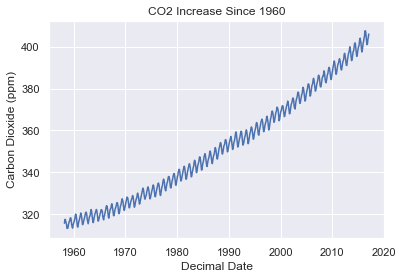

In [21]:
# Display data to fit regression to compare models with only 1 variable
sns.lineplot(df['Decimal Date'],df['Carbon Dioxide (ppm)'])
plt.title("CO2 Increase Since 1960")

Using an OLS Regression the results are:
Coefficients:
 [[1.5281567]]

Intercept: [-2685.37947767]

R^2 Value: 0.9777037543219351


Text(0.5, 1.0, 'USING KNN REGRESSION')

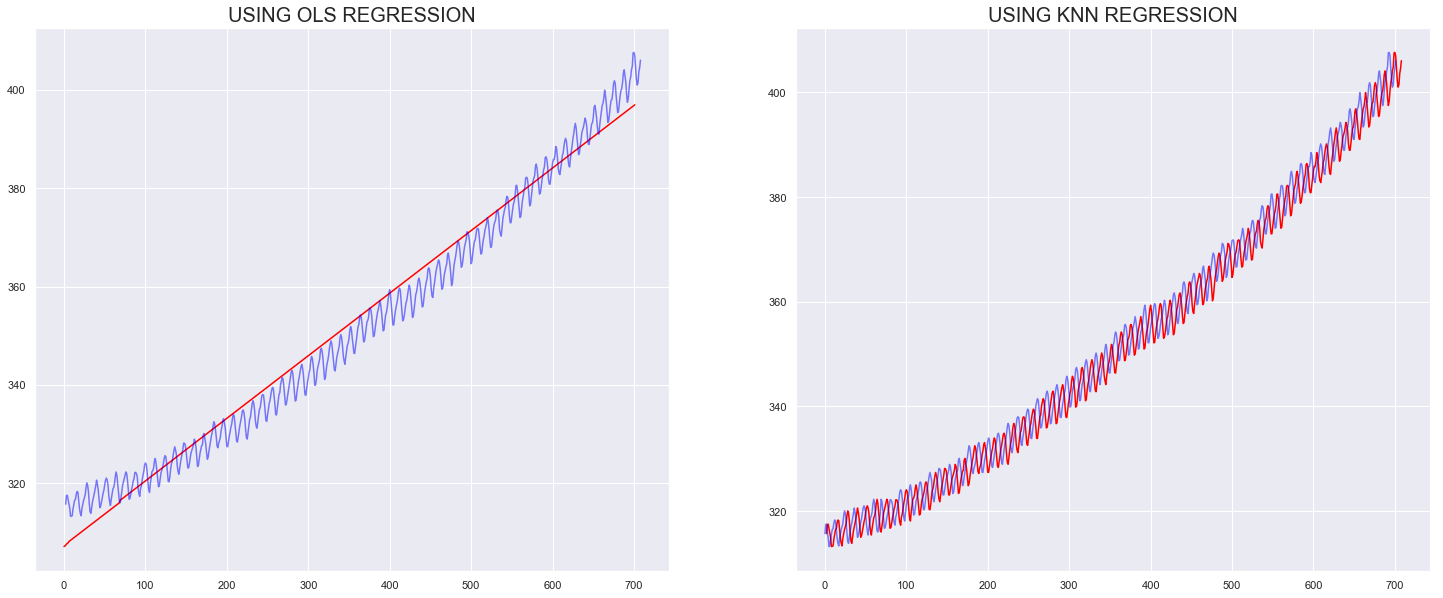

In [32]:
# Define inputs for each model
X = pd.DataFrame(df['Decimal Date'])
Y = pd.DataFrame(df['Carbon Dioxide (ppm)'])

# Fit trendline with OLS Regression
regression = linear_model.LinearRegression()
regression.fit(X,Y)
pred1 = pd.DataFrame(regression.predict(X).ravel())
print("Using an OLS Regression the results are:")
print("Coefficients:\n",regression.coef_)
print("\nIntercept:",regression.intercept_)
print("\nR^2 Value:",regression.score(X,Y))

# Fit trendline with KNN Regression
knn = neighbors.KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(X, Y)
pred2 = pd.DataFrame(knn.predict(X).ravel())

f=plt.figure(figsize=(25,10))
plt.subplot(121)
plt.plot(pred1,color='red')
plt.plot(Y,color='blue',alpha=0.5)
plt.title("USING OLS REGRESSION",size=20)
plt.subplot(122)                  
plt.plot(Y,color='red')
plt.plot(pred2,color='blue',alpha=0.5)
plt.title("USING KNN REGRESSION",size=20)

In [23]:
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: -1.17 (+/- 2.62)


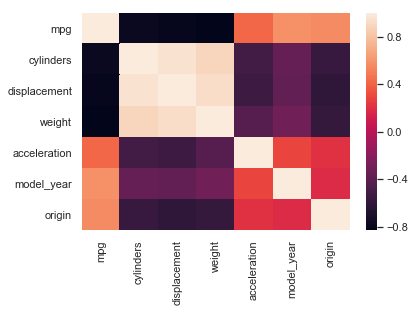

In [24]:
data = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\MPG_Prediction\mpg.csv')
sns.heatmap(data.corr())

In [25]:
X = data[['cylinders','displacement','weight','acceleration','model_year']]
Y = data['mpg']
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [26]:
# Fit trendline with OLS Regression
regression = linear_model.LinearRegression()
regression.fit(X,Y)
pred1 = pd.DataFrame(regression.predict(X).ravel())

# Fit trendline with KNN Regression
knn = neighbors.KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(X, Y)
pred2 = pd.DataFrame(knn.predict(X).ravel())

In [27]:
print('''USING THE OLS MODEL:''')
print("Coefficients:\n",regression.coef_)
print("\nIntercept:",regression.intercept_)
print("\nR^2 Value:",regression.score(X,Y))

USING THE OLS MODEL:
Coefficients:
 [-0.25858516  0.00726771 -0.00692571  0.08034746  0.75530084]

Intercept: -14.569690476020355

R^2 Value: 0.8086876515237436


In [28]:
values = pd.DataFrame(Y)
values['OLS_Prediction'] = pred1
values['KNN_Prediction'] = pred2

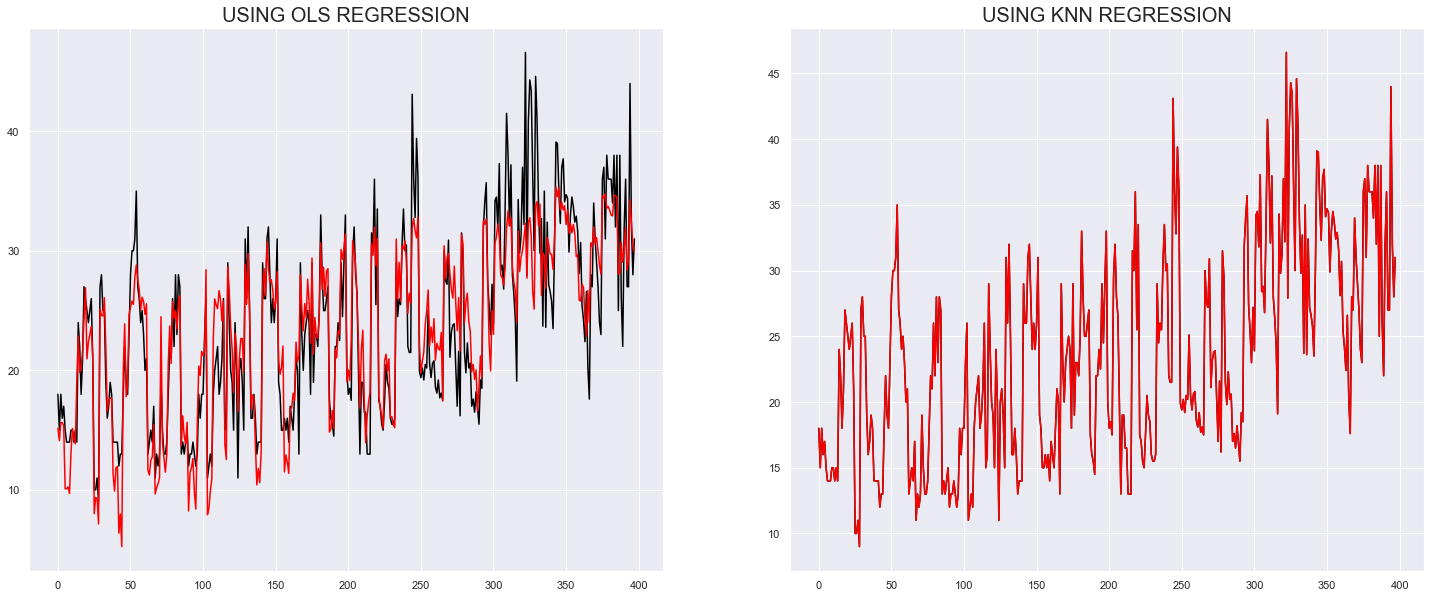

In [29]:

f = plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("USING OLS REGRESSION",size=20)
plt.plot(values['mpg'],color='black')
plt.plot(values['OLS_Prediction'],color='red')
plt.subplot(122)
plt.title("USING KNN REGRESSION",size=20)
plt.plot(values['mpg'],color='black')
plt.plot(values['KNN_Prediction'],color='red')
plt.show()

In [30]:
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.30 (+/- 1.06)


A knn model seems like it could very easily overfit the data, especially if the knn regression is weighted by the distance of the points. 